# Searching for Cinderella


We naturally root for the underdogs, and when they score the upset, we are extremely quick to put forth all the euphemysms imaginable.   But, the NCAA Basketball Tournament has a language of its own.   March Madness (tm) loves it's Cinderellas.

Ok, I like analogies, so assuming we are Prince Charming, let's talk how we can find Cinderella before the clock strikes midnight.  And for good measure, lets see if we can fit in the rest of the analogy with the Evil Step-sisters (one has to be Duke right?), Fairy Godmother (Gus Johnson?), and the pumpkin carriage  (uh... sure).


So how does one define a "Cinderella."  It seems fairly open to interpretation, but really is about some label of upsets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
carolinaBlue = 'deepskyblue'  # because d00k sucks

In [2]:
DetailedResults = pd.read_csv("2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv")
teams = pd.read_csv("2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MTeams.csv")
historical_seeds = pd.read_csv("2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneySeeds.csv")
program_success = pd.read_csv("2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/refreshed_files/TourneyHistory.csv")
rounds = pd.read_csv("2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv")
Results = pd.read_csv("2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneyCompactResults.csv")

In [3]:
top_25 = program_success.head(25).sort_values('# Tourneys', ascending = True)
total_years =  2019-1984 # our data goes  from the '84/85 season to the '18/19 season

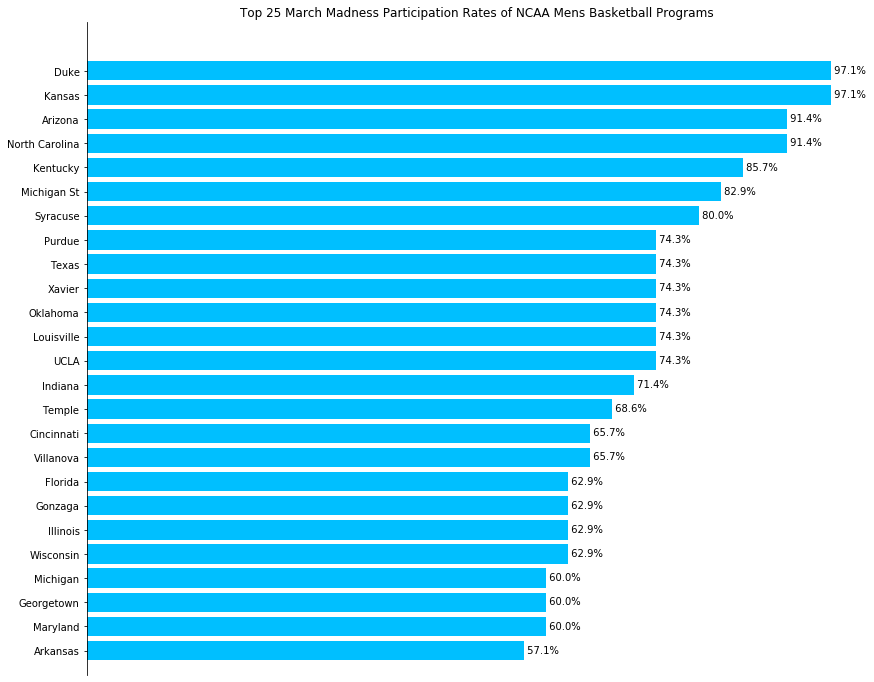

In [4]:
top_25 = top_25.sort_values('# Tourneys', ascending = True)

plt.figure(figsize=(14,12))
plt.barh(top_25['TeamName'], top_25['# Tourneys'], color = carolinaBlue)

sns.despine(bottom=True)
plt.xticks([])
plt.ylim(-1,26)

plt.title('Top 25 March Madness Participation Rates of NCAA Mens Basketball Programs')

for i, v in enumerate(top_25['# Tourneys']):
    plt.text(v+0.003, i - 0.1, f' {str(round(v*100/total_years,1))}%', fontsize = 10)

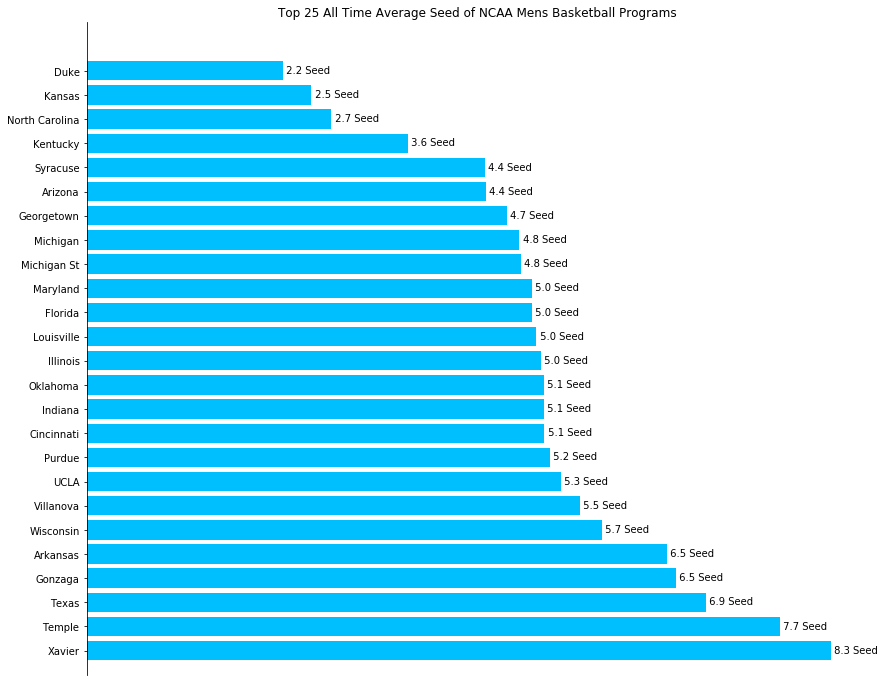

In [5]:
top_25 = top_25.sort_values('Average Seed', ascending = False)

plt.figure(figsize=(14,12))
plt.barh(top_25['TeamName'], top_25['Average Seed'], color = carolinaBlue)

sns.despine(bottom=True)
plt.xticks([])
plt.ylim(-1,26)

plt.title('Top 25 All Time Average Seed of NCAA Mens Basketball Programs')

for i, v in enumerate(top_25['Average Seed']):
    plt.text(v+0.003, i - 0.1, f' {str(round(v,1))} Seed', fontsize = 10)

# Sponsorships  
Lets extrapolate schools for their sponsors and see how they rerank

Sponsor data was hand collected and collated.  Most data collections are woefully incomplete, and sometimes out of date.  So sponsors were discovered through image search for recent in game photos and identifying logo on team jersey.

For simplicity's sake and complete lack of information.  
Sponsors are assigned to each team for the 2019-2020 season, but counts as the same sponsor for all seasons they have been participating in the tournament.   


In [6]:
sponsorships = pd.read_csv("2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/refreshed_files/MTeams_Detailed.csv")

In [7]:
sponsorships.head()

,TeamID,TeamName,FirstD1Season,LastD1Season,Sponsor,Notes:,2019sponsorshipvalue,Unnamed: 7
0,1101,Abilene Chr,2014,2020,Nike,acu nike 2015,NaN,NaN
1,1102,Air Force,1985,2020,Nike,NaN,NaN,NaN
2,1103,Akron,1985,2020,Adidas,NaN,NaN,NaN
3,1104,Alabama,1985,2020,Nike,NaN,NaN,NaN
4,1105,Alabama A&M,2000,2020,Nike,2018,NaN,NaN


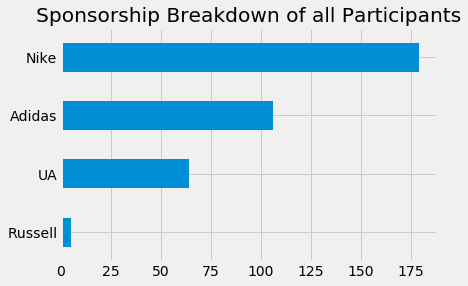

In [8]:
plt.style.use('fivethirtyeight')

sponsorships.Sponsor.value_counts() \
    .sort_values() \
    .plot(kind='barh', title = "Sponsorship Breakdown of all Participants")
plt.show()

In [9]:

seedSponsor = top_25.merge(sponsorships[['TeamID', 'Sponsor']], on='TeamID', how='left')


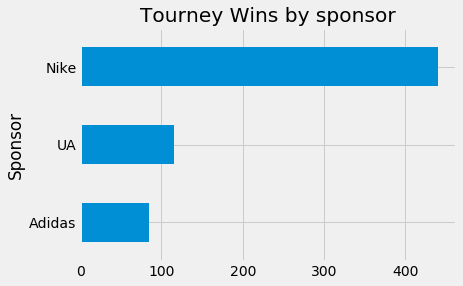

In [10]:
plt.style.use('fivethirtyeight')
seedSponsor.groupby('Sponsor')['# Tourneys'] \
    .sum() \
    .sort_values() \
    .plot(kind='barh', title = "Tourney Wins by sponsor")
plt.show()

# Does Seeding Matter?

In [11]:
# looking at seeding and point differential

df_Seeds = pd.read_csv("2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneySeeds.csv")
df_Seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [12]:
# Convert Seed from String to Int
# so "W01" --> is 1, with the advent of the play in games, we only care about 2nd and 3rd positions in the string.
def convertSeed(seed):
    return (int(seed[1:3]))

In [13]:
df_Seeds['SeedInt'] = df_Seeds['Seed'].apply(convertSeed)
df_Seeds.head()

,Season,Seed,TeamID,SeedInt
0,1985,W01,1207,1
1,1985,W02,1210,2
2,1985,W03,1228,3
3,1985,W04,1260,4
4,1985,W05,1374,5


In [14]:
# we're keeping DayNum for a round by round comparison.
Results.drop(columns = ["WLoc", "NumOT"], inplace = True, axis = 1)
Results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,1985,136,1116,63,1234,54
1,1985,136,1120,59,1345,58
2,1985,136,1207,68,1250,43
3,1985,136,1229,58,1425,55
4,1985,136,1242,49,1325,38


In [15]:
# merge our two df's.  Rename once for winning seeds, once for losing seeds.
# every now and then I wish we had a nice vlookup in pandas.

winners = df_Seeds.rename(columns = {'TeamID':'WTeamID', 'SeedInt':'WSeed'}) 
df_merged = pd.merge(left = Results, right = winners, how = 'left', 
                    on=['Season', 'WTeamID' ])

losers = df_Seeds.rename(columns = {'TeamID':'LTeamID', 'SeedInt':'LSeed'}) 
df_merged = pd.merge(left = df_merged, right = losers, how = 'left', 
                    on=['Season', 'LTeamID' ])



In [16]:
df_merged = df_merged.drop(columns=['Seed_x', 'Seed_y'])

In [17]:
df_merged['seed_diff'] = df_merged['WSeed'] - df_merged['LSeed']
df_merged['score_diff'] = df_merged['WScore'] - df_merged['LScore'] 

In [18]:
df_merged.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WSeed,LSeed,seed_diff,score_diff
0,1985,136,1116,63,1234,54,9,8,1,9
1,1985,136,1120,59,1345,58,11,6,5,1
2,1985,136,1207,68,1250,43,1,16,-15,25
3,1985,136,1229,58,1425,55,9,8,1,3
4,1985,136,1242,49,1325,38,3,14,-11,11


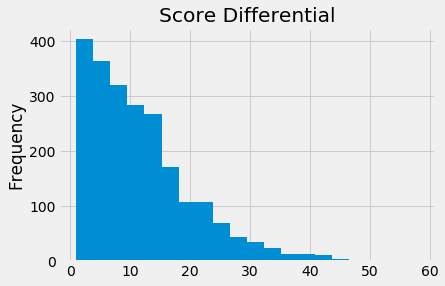

In [19]:
df_merged['score_diff'].plot(kind = 'hist', bins = 20, label = "Score Differential")
plt.title('Score Differential')
plt.show()

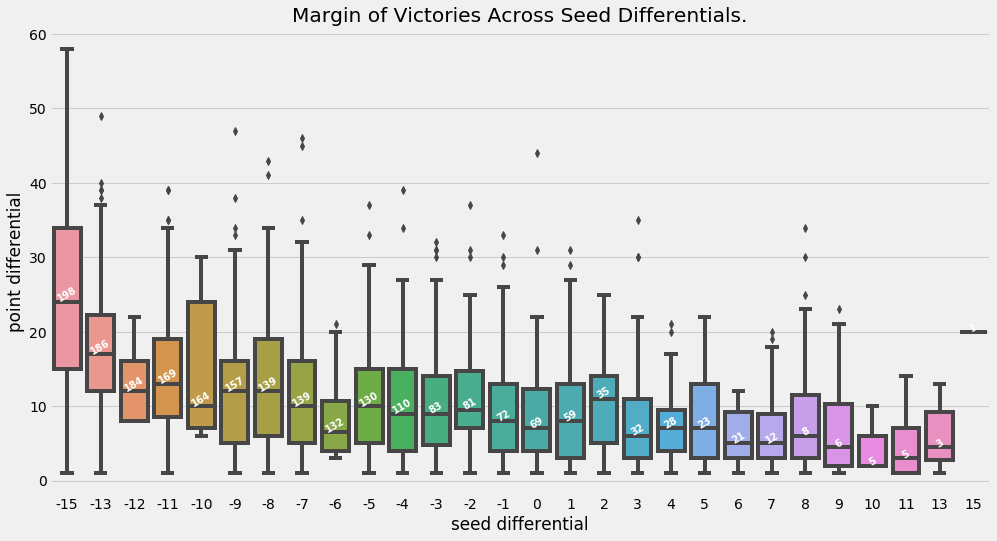

In [20]:
fig=plt.figure(figsize = (15,8))
ax = sns.boxplot(x="seed_diff", y="score_diff", data=df_merged)
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('seed differential')
ax.set_ylabel('point differential')
ax.set_title('Margin of Victories Across Seed Differentials.')

# Calculate number of observations per group & where to position labels
medians = df_merged.groupby(['seed_diff'])['score_diff'].median().values
nobs = df_merged['seed_diff'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = [i for i in nobs] 
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='x-small', color='w', weight='semibold', rotation = 30)
 
plt.show()


In [22]:
# doing a little data prep to graph winshares by seed differential.

y = df_merged['seed_diff'].value_counts().sort_index().values.tolist()
# can't have 14 seed diff
y.insert(1, 0)
y.insert(28, 0)
y.insert(27, 0)

In [24]:
print(rounds.EarlyDayNum.value_counts())
print(rounds.LateDayNum.value_counts())

# ok, a bit tricky.   134 and 135 look like the play in games, which are relatively new so the counts are consistent. 

154    112
152    112
145    112
143    112
138    112
136    112
134     48
Name: EarlyDayNum, dtype: int64
154    112
152    112
146    112
144    112
139    112
137    112
135     48
Name: LateDayNum, dtype: int64


In [25]:

def convertRound(DayNum):
    '''
    Convert DayNum to appropriate tournament round.   Play-In Games counted as 0, Round 1 as 1, etc.
    '''
    
    if (DayNum == 134) | (DayNum == 135):
        return 68
    elif (DayNum == 136) | (DayNum == 137):
        return 64
    elif (DayNum == 138) | (DayNum == 139):
        return 32
    elif (DayNum == 143) | (DayNum == 144):
        return 16
    elif (DayNum == 145) | (DayNum == 146):
        return 8
    elif (DayNum == 152):
        return 4
    else:
        #only left over daynum should be 154 at this point.
        return 2
    

In [26]:
df_merged['Round'] = df_merged.DayNum.apply(convertRound)
df_merged.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WSeed,LSeed,seed_diff,score_diff,Round
0,1985,136,1116,63,1234,54,9,8,1,9,64
1,1985,136,1120,59,1345,58,11,6,5,1,64
2,1985,136,1207,68,1250,43,1,16,-15,25,64
3,1985,136,1229,58,1425,55,9,8,1,3,64
4,1985,136,1242,49,1325,38,3,14,-11,11,64


In [27]:
hs_wins_count = []
ls_wins_count = []
for i in range(31):
    if (i<15):
        hs_wins_count.append(y[i])
    elif (i>15):
        ls_wins_count.append(y[i]*-1)
    else:
        None
print(len(hs_wins_count))
ls_wins_count.reverse()
print(len(ls_wins_count))

15
15


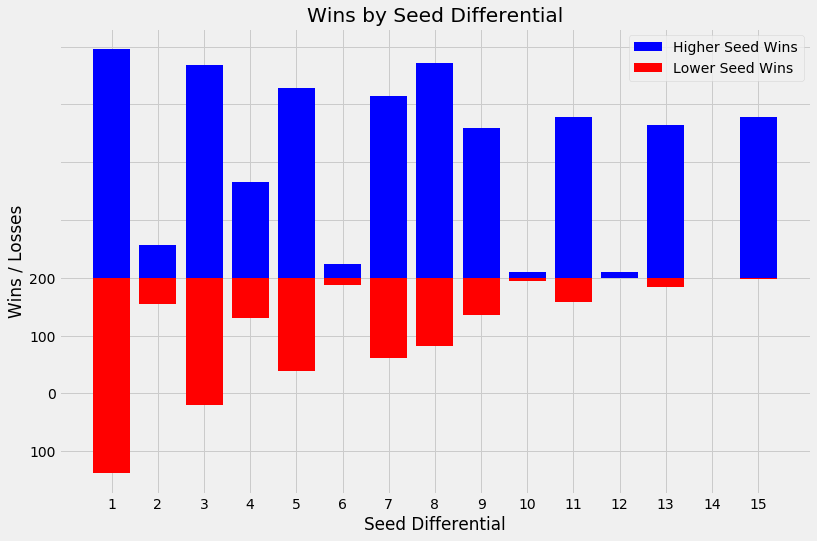

In [33]:
x = range(15, 0, -1)
label = ['Higher Seed Wins', 'Lower Seed Wins']
fig = plt.figure(figsize = (12,8))
ax = plt.subplot(111)
ax.bar(x, hs_wins_count, color = 'b')
ax.bar(x, ls_wins_count, color = 'r')
ax.set_xticks(x)
ax.set_yticklabels(('200', '100', '0', '100', '200'))
ax.legend(label, loc = 'best')
ax.set_xlabel('Seed Differential')
ax.set_ylabel('Wins / Losses')
plt.title("Wins by Seed Differential")
plt.show()

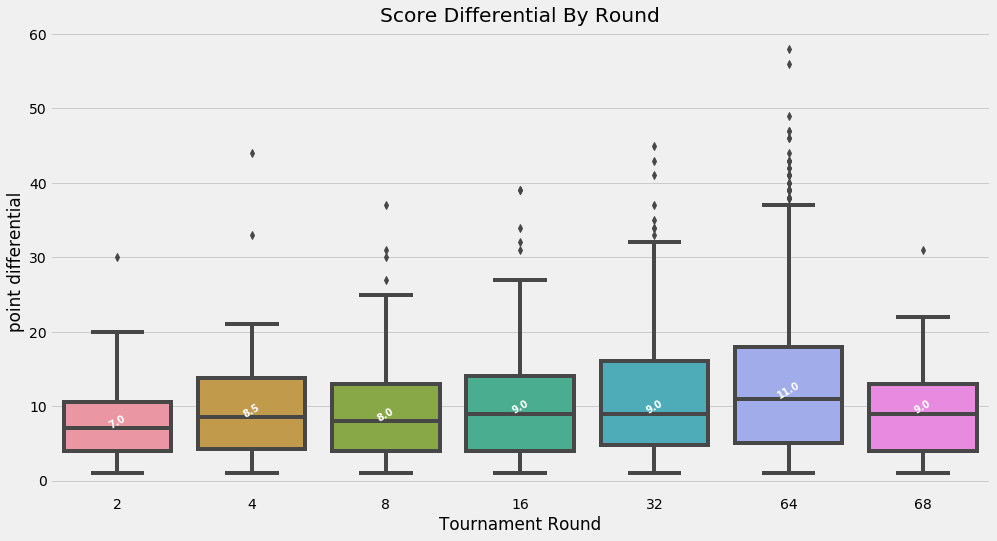

In [35]:
# score differential by round
fig=plt.figure(figsize = (15,8))
ax = sns.boxplot(x="Round", y="score_diff", data=df_merged)
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Tournament Round')
ax.set_ylabel('point differential')
ax.set_title('Score Differential By Round')

# Calculate number of observations per group & where to position labels
medians = df_merged.groupby(['Round'])['score_diff'].median().values
nobs = medians
nobs = [str(x) for x in nobs.tolist()]
nobs = [i for i in nobs] 
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='x-small', color='w', weight='semibold', rotation = 30)
 
plt.show()

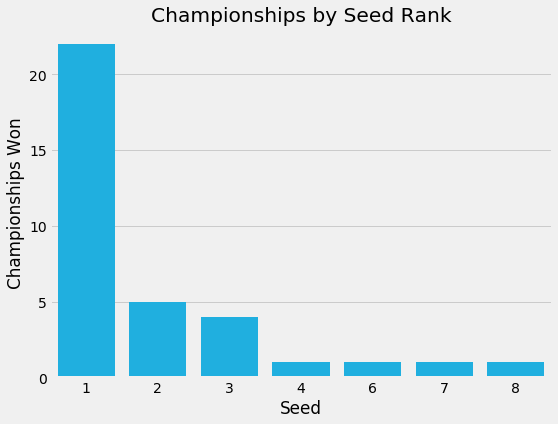

In [36]:
# alright we have a bunch of information now to share.  
# which seeds end up champions.
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df_merged[df_merged.Round == 2].WSeed, color = carolinaBlue)
ax.set_title("Championships by Seed Rank")
ax.set_xlabel("Seed")
ax.set_ylabel("Championships Won")
plt.show()


In [37]:
df_merged.to_clipboard(sep=',')

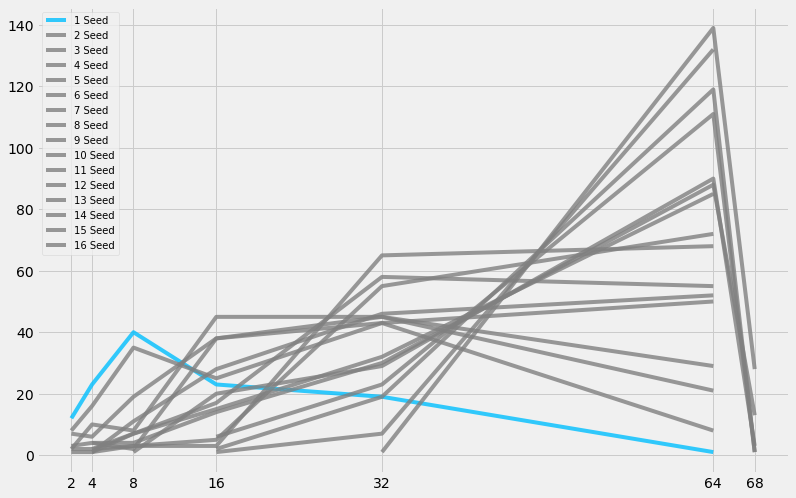

In [38]:
# score differential by round
df_facet = df_merged
"""df_facet['LSeed'].apply(str)
g = sns.FacetGrid(df_facet, col='LSeed', col_wrap=4,
                  margin_titles=True, height=4, aspect=1)
g.map(plt.hist, 'Round');
g.set_titles('{col_name} - Seed')"""

plt.figure(figsize=(12,8))
for i in range(1,17):
    df_dummy = df_facet[df_facet['LSeed'] == i]
    df = df_dummy.Round.value_counts()
    if (i == 1):
        plot_color = carolinaBlue
    else:
        plot_color = 'grey'
    ax = sns.lineplot(df.index, df.values, alpha=0.8, color = plot_color, label = ('%d Seed' % i))
    
    #sns.lineplot(df['Round'], df['Round']., err_style=None)
ax.set(xticks=(68, 64, 32, 16, 8, 4, 2))
plt.legend(fontsize = 10)

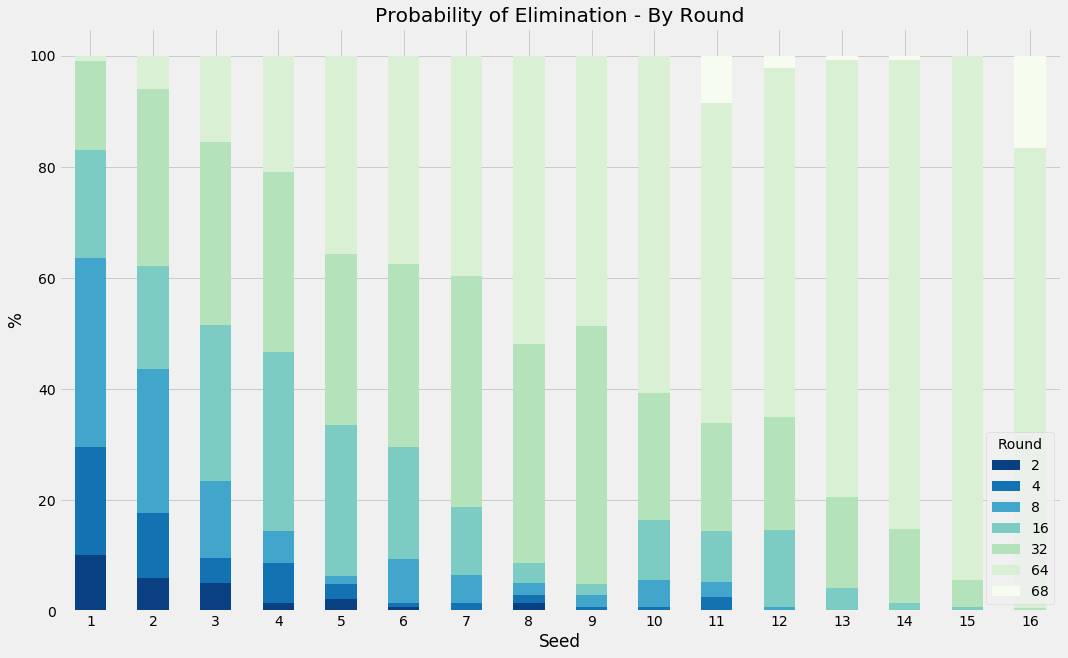

In [40]:

ax= pd.crosstab(df_merged['LSeed'], df_merged['Round']).apply(lambda r: r/r.sum()*100, axis=1)
ax.plot.bar(figsize=(16,10),stacked=True, rot=0,cmap = 'GnBu_r')

plt.legend(loc='best',title="Round")

plt.xlabel('Seed')
plt.ylabel('%')
plt.title('Probability of Elimination - By Round')

plt.show()

summary:
- Wins and overall success - Duke and Kansas seems to be great.  If we were to map out the coaches, I'm willing to bet Coach K would be his own Gartner Magic Quadrant, with Calipari and Roy Williams in whatever Tier 2 is.
- Sponsorship seems to be Nike's world and every one else should just be happy to have skin in the game.  We'll do more with branding later, but taking a look at the low hanging fruit there was at least interesting.
- There seems to be at least some level of correlation between seed differential and scoring differential which makes sense. 
- As we get further along per round, the games get closer and closer.
- 1 Seeds often win championships.   
But who really cares about historical observations and cool charts, lets get to the predictions.



# Data Organization

Enough of the pretty stuff, lets get to building the model.   To do the model we need to understand our target variable, in which we have 2 to more or less play with.  Both are all about winning, but its a really a matter of magnitude, should we actually care.   

So really we need to think about what it is we are trying to predict.   

Who do we think is going to win, and at what confidence do we think they are going to win.  For every potential march madness matchup.
If one were to pick the high seed to win each match, you will be right roughly 70% of the time.  


Target(s):
- Margin of Victory (int maybe float) - so if positive, this implies winning
- Win (boolean)

# Train Data - Simple Regression
regression on seed differential
regression on reg season wins
regression on <blank>
    
Hey, what a coincidence.  We wanted to use seed differential and point differentials as our first regression test. Perfect!


In [ ]:
# quick review of our data. 
df_merged.head()

# more of a reminder to me.  
# Seed_diff is WSeed - LSeed, but score_diff is always the magnitude difference in scores.


First Model:  Using Seed difference to predict tourney.
    

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

In [ ]:

seed_model = df_merged.drop(columns = ['Season', 
                            'DayNum', 'WTeamID', 'WScore', 'LTeamID', 
                            'LScore', 'WSeed', 'LSeed', 'Round'])

seed_model.head()

In [ ]:
X_train = seed_model['seed_diff'].values.reshape(-1,1)
y_train = seed_model['score_diff'].values
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
logreg = LogisticRegression()
